In [1]:
import cvxpy as cp
import numpy as np
import dreye

In [2]:
pr_model = dreye.create_photoreceptor_model([350, 380, 460, 580], np.arange(300, 701, 1), capture_noise_level=0.01)

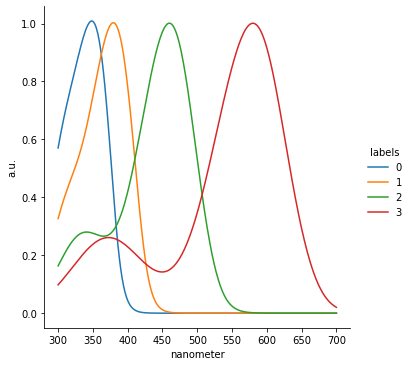

In [3]:
pr_model.sensitivity.plot()

In [4]:
measured_spectra = dreye.create_measured_spectra_container([340, 360, 405, 455, 505, 565, 614])

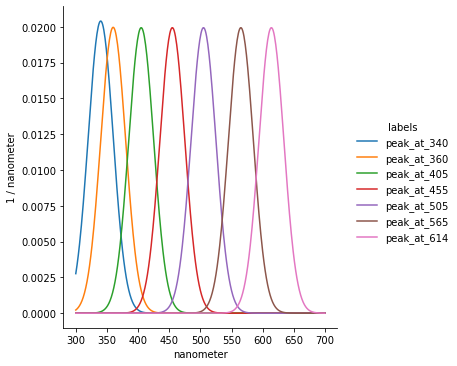

In [5]:
measured_spectra.normalized_spectra.plot()

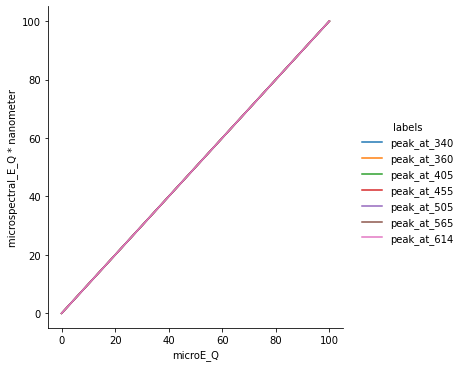

In [6]:
measured_spectra.intensities.plot()

In [8]:
spectra = measured_spectra.ints_to_spectra(np.ones(len(measured_spectra)) * 45)

In [10]:
type(spectra)

dreye.core.signal.Signal

In [19]:
np.eye(pr_model.wls.size).shape

(401, 401)

In [23]:
perfect_system = dreye.create_measured_spectra_container(np.eye(pr_model.wls.size)[:, 1:-1], wavelengths=pr_model.wls)

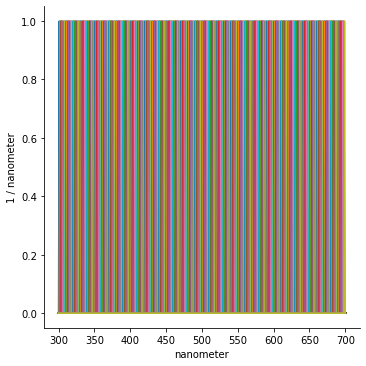

In [24]:
perfect_system.normalized_spectra.plot(legend=False)

In [14]:
model = dreye.BestSubstitutionFit(
    photoreceptor_model=pr_model, 
    measured_spectra=measured_spectra, 
    ignore_bounds=True, 
    substitution_type=1, 
)

In [25]:
pmodel = dreye.BestSubstitutionFit(
    photoreceptor_model=pr_model, 
    measured_spectra=perfect_system, 
    ignore_bounds=True, 
    substitution_type=1, 
)

In [15]:
model.fit(np.eye(pr_model.n_opsins).astype(bool))

BestSubstitutionFit(ignore_bounds=True,
                    measured_spectra=MeasuredSpectraContainer([[0.0 0.030693963587712564 0.06138792717542513 ... 0.21485774511398792  0.2455517087017005 0.2762456722894131] [0.0 0.03387969981329869 0.06775939962659738 ... 0.2371578986930908  0.27103759850638953 0.3049172983196882] [0.0 0.03730271116706283 0.07460542233412566 ... 0.2611189781694398  0....62780808 0.00029471786581284086] [0.0 2.651058094644252e-05 5.302116189288504e-05 ...  0.00018557406662509765 0.00021208464757154017 0.0002385952285179827] [0.0 2.140862620070981e-05 4.281725240141962e-05 ...  0.00014986038340496867 0.0001712690096056785 0.00019267763580638832]] microspectral_E_Q),
                    photoreceptor_model=LinearPhotoreceptor(0, 1, 2, 3),
                    substitution_type=1)

In [26]:
pmodel.fit(np.eye(pr_model.n_opsins).astype(bool))

BestSubstitutionFit(ignore_bounds=True,
                    measured_spectra=MeasuredSpectraContainer([[0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 11.11111111111111 22.22222222222222 ... 77.77777777777777  88.88888888888889 100.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] microspectral_E_Q; [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0....0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] microspectral_E_Q; [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 11.11111111111111 22.22222222222222 ... 77.77777777777777  88.88888888888889 100.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] microspectral_E_Q),
                    photoreceptor_model=LinearPhotoreceptor(0, 1, 2, 3),
                    substitution_type=1)

In [16]:
np.round(model.fitted_intensities_, 2)

array([[0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.3 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.87, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.32]])

In [27]:
np.round(pmodel.fitted_intensities_, 2)

array([[0.81, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.63, 1.5 , 1.37]])

In [28]:
model.fitted_intensities_df_

,,,,,,,peak_at_340,peak_at_360,peak_at_405,peak_at_455,peak_at_505,peak_at_565,peak_at_614
fitted_0,fitted_1,fitted_2,fitted_3,active,direction,substitution_type,,,,,,,
0.426377,0.326904,0.137092,0.109628,"(0,)",1,1,4.777416e-01,1.169021e-10,1.062934e-11,2.209399e-10,3.917395e-10,0.000000e+00,3.174915e-10
0.234598,0.396629,0.234598,0.134176,"(1,)",1,1,3.443358e-11,2.493075e-01,3.034695e-01,4.243646e-13,5.886772e-12,1.493787e-11,2.579155e-11
0.010750,0.049435,0.781530,0.158286,"(2,)",1,1,6.656063e-12,5.852278e-12,9.389074e-12,8.654058e-01,4.974055e-12,0.000000e+00,0.000000e+00
0.010000,0.010000,0.010497,0.969503,"(3,)",1,1,8.691633e-13,5.418518e-13,0.000000e+00,0.000000e+00,5.916037e-12,5.127099e-10,1.319495e+00


In [29]:
pmodel.fitted_intensities_df_

,,,,,,,peak_at_301,peak_at_302,peak_at_303,peak_at_304,peak_at_305,peak_at_306,peak_at_307,peak_at_308,peak_at_309,peak_at_310,...,peak_at_690,peak_at_691,peak_at_692,peak_at_693,peak_at_694,peak_at_695,peak_at_696,peak_at_697,peak_at_698,peak_at_699
fitted_0,fitted_1,fitted_2,fitted_3,active,direction,substitution_type,,,,,,,,,,,,,,,,,,,,,
0.481866,0.280975,0.145778,0.091381,"(0,)",1,1,8.079590e-01,6.350874e-10,1.557992e-10,3.262880e-11,7.171889e-12,5.035464e-12,6.968995e-12,8.616491e-12,9.379459e-12,9.466176e-12,...,3.547513e-11,3.888157e-11,4.267253e-11,4.689741e-11,5.161231e-11,5.688086e-11,6.277534e-11,6.937775e-11,7.678126e-11,8.509168e-11
0.147301,0.534103,0.173793,0.144803,"(1,)",1,1,6.772704e-13,6.436673e-13,6.118519e-13,5.817068e-13,5.531254e-13,5.260113e-13,5.002778e-13,4.758471e-13,4.526500e-13,4.306249e-13,...,2.506680e-11,2.677073e-11,2.860264e-11,3.057282e-11,3.269245e-11,3.497366e-11,3.742970e-11,4.007496e-11,4.292518e-11,4.599756e-11
0.010029,0.015414,0.843499,0.131058,"(2,)",1,1,1.906159e-15,1.088162e-15,3.236027e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.868984e-13,6.327930e-13,6.819897e-13,7.346664e-13,7.910096e-13,8.512164e-13,9.154972e-13,9.840794e-13,1.057211e-12,1.135166e-12
0.010000,0.010000,0.010006,0.969994,"(3,)",1,1,3.781278e-10,3.827810e-10,3.873074e-10,3.917079e-10,3.959841e-10,4.001381e-10,4.041721e-10,4.080890e-10,4.118919e-10,4.155843e-10,...,2.180610e+00,2.184660e+00,2.146346e+00,2.077336e+00,1.986099e+00,1.878872e+00,1.760407e+00,1.634486e+00,1.504222e+00,1.372229e+00
